In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# измерения

In [5]:
rcalib = '''2922 7032
2892 6929
2824 6717
2812 6678
2790 6599
2766 6533
2754 6507
2720 6402
2712 6383
2694 6334
2680 6305
2664 6267
2640 6217
2624 6164
2612 6143
2592 6096
2582 6074
2564 6030
2542 5976
2526 5945
2498 5882
2482 5852
2218 5401
2180 5341
2168 5331'''
calib = np.array([list(map(float, s.split())) for s in rcalib.split('\n')])

# Калибровка

In [16]:
def graph():
    fig = plt.figure(figsize=(7, 4))
    plt.grid()
    plt.xlabel('$\\theta, ^\\circ$')
    plt.ylabel('$\lambda, \AA$')
    x = calib[::,0]
    y = calib[::,1]
    plt.errorbar(x, y, fmt='.k', xerr=1, yerr=1)

    p = np.poly1d(np.polyfit(x, y, 2))
    
    stretch = np.linspace(np.min(x)*0.95, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, p(stretch), 'g')
    plt.savefig('graph.png')
    return p

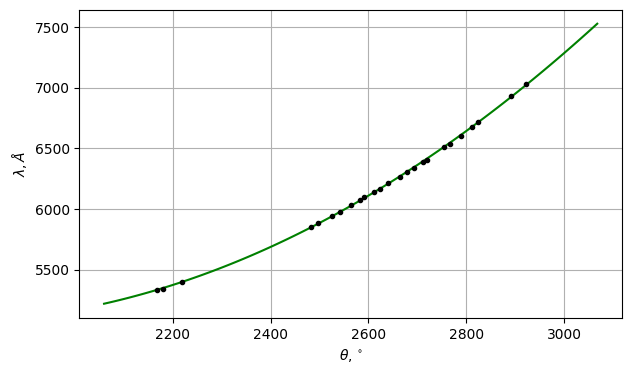

In [17]:
p = graph()

# измерения

In [31]:
# 2168
rdata1 = '''6.003 0.234
4.994 0.167
4.006 0.115
3.007 0.062
2.000 0.030
1.805 0.030
1.610 0.027
1.408 0.020
1.205 0.016
1.002 0.012
0.804 0.010
0.605 0.008
0.400 0.007
2.503 0.052
3.514 0.102
4.507 0.148
5.503 0.204
3.252 0.072'''

# 2922
rdata2 = '''2.002 0.047
2.300 0.070
2.100 0.057
1.802 0.035
2.502 0.150
3.000 0.300
2.815 0.240
3.200 0.359
3.404 0.392
3.600 0.412
2.400 0.083
1.600 0.024'''

# 2640
rdata3 = '''1.501 0.046
1.600 0.057
1.700 0.065
1.801 0.065
1.901 0.072
2.001 0.089
2.100 0.098
2.200 0.106
2.301 0.114
2.403 0.124'''

# 2542
rdata4 = '''1.500 0.039
1.601 0.049
1.703 0.058
1.802 0.065
1.901 0.071
2.003 0.080
2.100 0.085
2.200 0.093
2.301 0.100
2.399 0.107'''

data1 = np.array([list(map(float, s.split())) for s in rdata1.split('\n')])
data2 = np.array([list(map(float, s.split())) for s in rdata2.split('\n')])
data3 = np.array([list(map(float, s.split())) for s in rdata3.split('\n')])
data4 = np.array([list(map(float, s.split())) for s in rdata4.split('\n')])

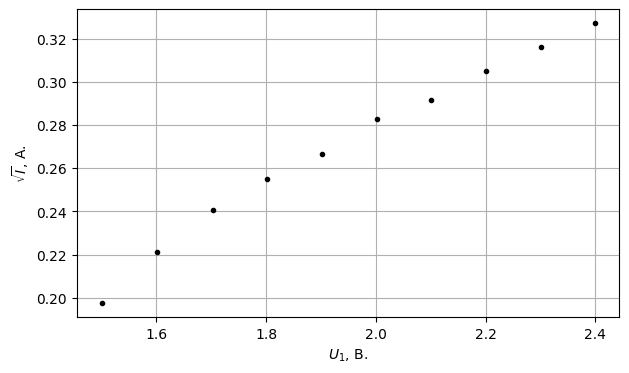

In [34]:
def graph_2():
    fig = plt.figure(figsize=(7, 4))
    plt.grid()
    plt.xlabel('$U_1$, В.')
    plt.ylabel('$\sqrt{I}$, А.')
    x = data4[::,0]
    y = data4[::,1]
    y = np.sqrt(y)
    plt.errorbar(x, y, fmt='.k')
    def MSE(x, y):
        D = (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)
        b = (np.sum(y) * np.sum(x ** 2) - np.sum(x) * np.sum(x * y)) / D
        a = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / D
        return (a, b)
    # k, b = MSE(x, y)
    # x_0 = -b / k
    # stretch = np.linspace(x_0 - abs(x_0) * 0.05, np.max(x)*1.05, num=100)
    # ax, = plt.plot(stretch, stretch * k + b)
    # plt.legend([ax], ['Аппроксимированная прямая'])
    plt.savefig('kach.jpg')
    # db = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (np.sum(x ** 2) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    # dk = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    # return (k, b, dk, db)
graph_2()

In [39]:
def graph_2(data, index, name):
    fig = plt.figure(figsize=(7, 4))
    plt.grid()
    plt.xlabel('$U_1$, В.')
    plt.ylabel('$\sqrt{I}$, А.')
    x = data[:index:,0]
    y = data[:index:,1] ** 0.5
    plt.errorbar(x, y, fmt='.k', xerr=np.full(x.shape, 0.001), yerr=0.001 / y / 2)
    def MSE(x, y):
        D = (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)
        b = (np.sum(y) * np.sum(x ** 2) - np.sum(x) * np.sum(x * y)) / D
        a = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / D
        return (a, b)
    k, b = MSE(x, y)
    x_0 = -b / k
    stretch = np.linspace(x_0 - abs(x_0) * 0.05, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, stretch * k + b)
    plt.savefig('graph_2_{}.jpg'.format(name))
    db = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (np.sum(x ** 2) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    dk = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    return (k, b, dk, db)

/tmp/ipykernel_2977987/2289632747.py:11: RuntimeWarning: invalid value encountered in scalar divide
  b = (np.sum(y) * np.sum(x ** 2) - np.sum(x) * np.sum(x * y)) / D
/tmp/ipykernel_2977987/2289632747.py:12: RuntimeWarning: invalid value encountered in scalar divide
  a = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / D


ValueError: zero-size array to reduction operation maximum which has no identity

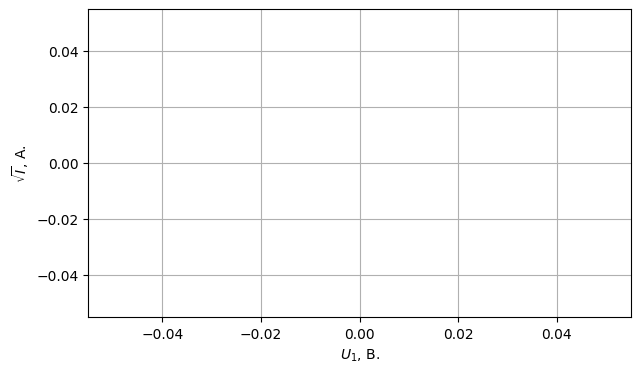

In [40]:
kv = [0, 0, 0]
bv = [0, 0, 0]
dkv = [0, 0, 0]
dbv = [0, 0, 0]
(kv[0], bv[0], dkv[0], dbv[0]) = graph_2(np.sort(data1, axis=0), 0, '1')
(kv[1], bv[1], dkv[1], dbv[1]) = graph_2(np.sort(data2, axis=0), 0, '2')
graph_2(np.sort(data3, axis=0), 0, '3')
(kv[2], bv[2], dkv[2], dbv[2]) = graph_2(np.sort(data4, axis=0), 0, '4')

kv = np.array(kv)
bv = np.array(bv)
dkv = np.array(dkv)
dbv = np.array(dbv)

In [171]:
kv

array([0.26179132, 0.17686046, 0.23863222])

In [170]:
dkv

array([3.19503188e-05, 4.22511510e-05, 1.10100811e-04])

In [169]:
bv

array([0.12627341, 0.13653448, 0.14220723])

In [168]:
dbv

array([4.03356166e-06, 7.60974036e-06, 2.09686730e-05])

In [186]:
theta = np.array([2350, 1850, 2050])
print(p(theta))

[6203.70676912 5305.72931563 5581.75880026]


In [172]:
def graph_3():
    fig = plt.figure(figsize=(7, 4))
    plt.grid(linestyle='--')
    plt.xlabel('$\omega$, 1/с')
    plt.ylabel('$V_0$, В')
    x = 3e18 / p(theta)
    y = np.abs(-bv / kv)
    plt.errorbar(x, y, fmt='.k', xerr=0, yerr=((1.0 / kv ** 2) * dbv ** 2 + (bv ** 2 / kv ** 4) * dkv ** 2) ** 0.5)
    def MSE(x, y):
        a = (np.sum((x - np.mean(x)) * (y - np.mean(y))))/(np.sum((x - np.mean(x))**2))
        b = np.mean(y) - a * np.mean(x)
        return (a, b)
    k, b = MSE(x, y)
    stretch = np.linspace(np.min(x) * 0.95, np.max(x)*1.05, num=100)
    ax, = plt.plot(stretch, stretch * k + b)
    plt.legend([ax], ['Аппроксимированная прямая'])
    plt.savefig('graph_3.jpg')
    db = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (np.sum(x ** 2) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    dk = (np.sum((y - k * x - b) ** 2) / (len(x) - 2)) * (len(x) / (np.sum(x ** 2) * len(x) - np.sum(x) ** 2)) ** 0.5
    return (k, b, dk, db)

[5.88676356e-05 1.84424824e-04 2.74950179e-04]


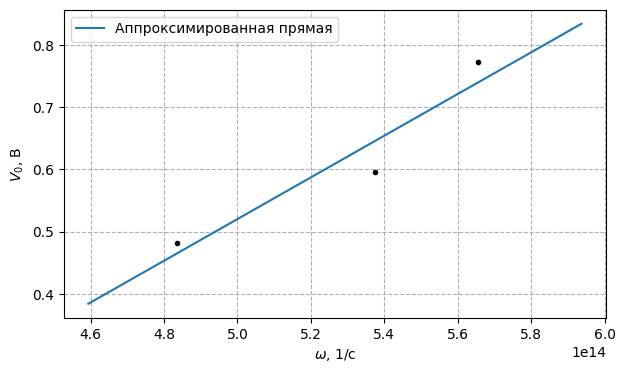

In [173]:
(he, we, dhe, dwe) = graph_3()

In [187]:
print(he, we, dhe, dwe)
h = 1.6e-19 * he / 2 / pi
dh = 1.6e-19 * dhe / 2 / pi
print(h, dh)
print(we)
print(we / he)

3.3464835762407118e-15 -1.1529490431031357 6.519461610970863e-17 0.03454755266987116
8.521750450152846e-35 1.6601672666941824e-36
-1.1529490431031357
